## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 55.1ms	remaining: 55.1s
1:	learn: 0.9301086	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9005637	total: 61.6ms	remaining: 20.5s
3:	learn: 0.8720983	total: 64.7ms	remaining: 16.1s
4:	learn: 0.8467410	total: 67.6ms	remaining: 13.5s
5:	learn: 0.8226672	total: 70.4ms	remaining: 11.7s
6:	learn: 0.7994702	total: 73.5ms	remaining: 10.4s
7:	learn: 0.7784272	total: 76.7ms	remaining: 9.51s
8:	learn: 0.7602192	total: 79.7ms	remaining: 8.78s
9:	learn: 0.7412421	total: 82.8ms	remaining: 8.19s
10:	learn: 0.7247930	total: 86.1ms	remaining: 7.75s
11:	learn: 0.7089951	total: 88.9ms	remaining: 7.32s
12:	learn: 0.6951345	total: 92ms	remaining: 6.99s
13:	learn: 0.6809276	total: 95.9ms	remaining: 6.75s
14:	learn: 0.6692630	total: 99ms	remaining: 6.5s
15:	learn: 0.6588323	total: 102ms	remaining: 6.26s
16:	learn: 0.6472700	total: 105ms	remaining: 6.05s
17:	learn: 0.6379982	total: 107ms	remaining: 5.85s
18:	learn: 0.6294674	total: 110ms	remaining: 5.68s
1

33:	learn: 0.5445860	total: 168ms	remaining: 4.77s
34:	learn: 0.5398906	total: 171ms	remaining: 4.71s
35:	learn: 0.5363592	total: 174ms	remaining: 4.66s
36:	learn: 0.5337228	total: 176ms	remaining: 4.59s
37:	learn: 0.5296892	total: 180ms	remaining: 4.54s
38:	learn: 0.5255485	total: 182ms	remaining: 4.5s
39:	learn: 0.5217941	total: 185ms	remaining: 4.45s
40:	learn: 0.5196440	total: 188ms	remaining: 4.41s
41:	learn: 0.5170220	total: 191ms	remaining: 4.36s
42:	learn: 0.5141148	total: 194ms	remaining: 4.32s
43:	learn: 0.5116444	total: 197ms	remaining: 4.27s
44:	learn: 0.5100547	total: 199ms	remaining: 4.23s
45:	learn: 0.5069096	total: 202ms	remaining: 4.2s
46:	learn: 0.5051685	total: 205ms	remaining: 4.16s
47:	learn: 0.5033968	total: 208ms	remaining: 4.12s
48:	learn: 0.5012433	total: 211ms	remaining: 4.09s
49:	learn: 0.4986132	total: 214ms	remaining: 4.06s
50:	learn: 0.4968022	total: 216ms	remaining: 4.03s
51:	learn: 0.4951632	total: 219ms	remaining: 4s
52:	learn: 0.4928924	total: 222ms	re

96:	learn: 0.4520952	total: 359ms	remaining: 3.34s
97:	learn: 0.4513919	total: 362ms	remaining: 3.33s
98:	learn: 0.4503747	total: 365ms	remaining: 3.32s
99:	learn: 0.4494783	total: 368ms	remaining: 3.31s
100:	learn: 0.4487329	total: 371ms	remaining: 3.3s
101:	learn: 0.4481325	total: 374ms	remaining: 3.29s
102:	learn: 0.4475445	total: 377ms	remaining: 3.28s
103:	learn: 0.4466014	total: 381ms	remaining: 3.28s
104:	learn: 0.4461730	total: 384ms	remaining: 3.28s
105:	learn: 0.4457259	total: 387ms	remaining: 3.26s
106:	learn: 0.4451085	total: 390ms	remaining: 3.26s
107:	learn: 0.4447909	total: 393ms	remaining: 3.25s
108:	learn: 0.4440936	total: 396ms	remaining: 3.23s
109:	learn: 0.4435519	total: 399ms	remaining: 3.23s
110:	learn: 0.4431075	total: 402ms	remaining: 3.22s
111:	learn: 0.4425498	total: 404ms	remaining: 3.21s
112:	learn: 0.4419106	total: 407ms	remaining: 3.2s
113:	learn: 0.4414425	total: 411ms	remaining: 3.19s
114:	learn: 0.4407446	total: 413ms	remaining: 3.18s
115:	learn: 0.4402

157:	learn: 0.4218088	total: 550ms	remaining: 2.93s
158:	learn: 0.4213239	total: 552ms	remaining: 2.92s
159:	learn: 0.4210022	total: 555ms	remaining: 2.92s
160:	learn: 0.4201256	total: 558ms	remaining: 2.91s
161:	learn: 0.4197073	total: 561ms	remaining: 2.9s
162:	learn: 0.4192052	total: 564ms	remaining: 2.89s
163:	learn: 0.4187949	total: 566ms	remaining: 2.89s
164:	learn: 0.4184572	total: 569ms	remaining: 2.88s
165:	learn: 0.4180680	total: 572ms	remaining: 2.88s
166:	learn: 0.4176884	total: 575ms	remaining: 2.87s
167:	learn: 0.4173026	total: 578ms	remaining: 2.86s
168:	learn: 0.4170486	total: 581ms	remaining: 2.85s
169:	learn: 0.4165960	total: 583ms	remaining: 2.85s
170:	learn: 0.4161870	total: 586ms	remaining: 2.84s
171:	learn: 0.4156228	total: 589ms	remaining: 2.83s
172:	learn: 0.4153041	total: 592ms	remaining: 2.83s
173:	learn: 0.4148857	total: 595ms	remaining: 2.82s
174:	learn: 0.4144190	total: 598ms	remaining: 2.82s
175:	learn: 0.4140875	total: 601ms	remaining: 2.81s
176:	learn: 0

220:	learn: 0.3982897	total: 742ms	remaining: 2.62s
221:	learn: 0.3981001	total: 745ms	remaining: 2.61s
222:	learn: 0.3978579	total: 750ms	remaining: 2.61s
223:	learn: 0.3976462	total: 753ms	remaining: 2.61s
224:	learn: 0.3973704	total: 756ms	remaining: 2.6s
225:	learn: 0.3971729	total: 759ms	remaining: 2.6s
226:	learn: 0.3968841	total: 762ms	remaining: 2.59s
227:	learn: 0.3965787	total: 765ms	remaining: 2.59s
228:	learn: 0.3963073	total: 767ms	remaining: 2.58s
229:	learn: 0.3960925	total: 770ms	remaining: 2.58s
230:	learn: 0.3957018	total: 773ms	remaining: 2.57s
231:	learn: 0.3954162	total: 775ms	remaining: 2.57s
232:	learn: 0.3951665	total: 778ms	remaining: 2.56s
233:	learn: 0.3949269	total: 781ms	remaining: 2.56s
234:	learn: 0.3945894	total: 784ms	remaining: 2.55s
235:	learn: 0.3944181	total: 787ms	remaining: 2.55s
236:	learn: 0.3941497	total: 789ms	remaining: 2.54s
237:	learn: 0.3939819	total: 792ms	remaining: 2.54s
238:	learn: 0.3938322	total: 795ms	remaining: 2.53s
239:	learn: 0.

280:	learn: 0.3839018	total: 937ms	remaining: 2.4s
281:	learn: 0.3836780	total: 940ms	remaining: 2.39s
282:	learn: 0.3832767	total: 943ms	remaining: 2.39s
283:	learn: 0.3831676	total: 946ms	remaining: 2.38s
284:	learn: 0.3830010	total: 949ms	remaining: 2.38s
285:	learn: 0.3826742	total: 952ms	remaining: 2.38s
286:	learn: 0.3824534	total: 955ms	remaining: 2.37s
287:	learn: 0.3821767	total: 958ms	remaining: 2.37s
288:	learn: 0.3819748	total: 961ms	remaining: 2.36s
289:	learn: 0.3817667	total: 964ms	remaining: 2.36s
290:	learn: 0.3815253	total: 967ms	remaining: 2.35s
291:	learn: 0.3813529	total: 969ms	remaining: 2.35s
292:	learn: 0.3812172	total: 972ms	remaining: 2.35s
293:	learn: 0.3809978	total: 975ms	remaining: 2.34s
294:	learn: 0.3807825	total: 978ms	remaining: 2.34s
295:	learn: 0.3805940	total: 981ms	remaining: 2.33s
296:	learn: 0.3801959	total: 984ms	remaining: 2.33s
297:	learn: 0.3799439	total: 987ms	remaining: 2.33s
298:	learn: 0.3797228	total: 990ms	remaining: 2.32s
299:	learn: 0

345:	learn: 0.3709569	total: 1.13s	remaining: 2.13s
346:	learn: 0.3708184	total: 1.13s	remaining: 2.13s
347:	learn: 0.3705958	total: 1.13s	remaining: 2.13s
348:	learn: 0.3703798	total: 1.14s	remaining: 2.12s
349:	learn: 0.3701923	total: 1.14s	remaining: 2.12s
350:	learn: 0.3700067	total: 1.14s	remaining: 2.12s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.11s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.11s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.1s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.1s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.1s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.09s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.09s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.08s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.08s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.08s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.07s
364:	learn: 0.3

404:	learn: 0.3614255	total: 1.32s	remaining: 1.94s
405:	learn: 0.3613607	total: 1.32s	remaining: 1.94s
406:	learn: 0.3612875	total: 1.32s	remaining: 1.93s
407:	learn: 0.3611516	total: 1.33s	remaining: 1.93s
408:	learn: 0.3609621	total: 1.33s	remaining: 1.92s
409:	learn: 0.3608193	total: 1.33s	remaining: 1.92s
410:	learn: 0.3604920	total: 1.34s	remaining: 1.92s
411:	learn: 0.3603038	total: 1.34s	remaining: 1.91s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.91s
413:	learn: 0.3599094	total: 1.35s	remaining: 1.91s
414:	learn: 0.3597887	total: 1.35s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.9s
416:	learn: 0.3594487	total: 1.36s	remaining: 1.9s
417:	learn: 0.3592759	total: 1.36s	remaining: 1.89s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.89s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.89s
420:	learn: 0.3587972	total: 1.37s	remaining: 1.88s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.88s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.88s
423:	learn: 0.3

467:	learn: 0.3523547	total: 1.51s	remaining: 1.72s
468:	learn: 0.3522115	total: 1.51s	remaining: 1.72s
469:	learn: 0.3521029	total: 1.52s	remaining: 1.71s
470:	learn: 0.3519673	total: 1.52s	remaining: 1.71s
471:	learn: 0.3518082	total: 1.52s	remaining: 1.71s
472:	learn: 0.3516593	total: 1.53s	remaining: 1.7s
473:	learn: 0.3514906	total: 1.53s	remaining: 1.7s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.7s
475:	learn: 0.3512406	total: 1.54s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.69s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.55s	remaining: 1.68s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.56s	remaining: 1.67s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.56s	remaining: 1.66s
486:	learn: 0.3

528:	learn: 0.3442153	total: 1.7s	remaining: 1.52s
529:	learn: 0.3441108	total: 1.71s	remaining: 1.51s
530:	learn: 0.3439546	total: 1.71s	remaining: 1.51s
531:	learn: 0.3438254	total: 1.71s	remaining: 1.51s
532:	learn: 0.3437049	total: 1.72s	remaining: 1.5s
533:	learn: 0.3435053	total: 1.72s	remaining: 1.5s
534:	learn: 0.3433236	total: 1.72s	remaining: 1.5s
535:	learn: 0.3432219	total: 1.73s	remaining: 1.49s
536:	learn: 0.3431615	total: 1.73s	remaining: 1.49s
537:	learn: 0.3430198	total: 1.73s	remaining: 1.49s
538:	learn: 0.3429422	total: 1.73s	remaining: 1.48s
539:	learn: 0.3428024	total: 1.74s	remaining: 1.48s
540:	learn: 0.3426641	total: 1.74s	remaining: 1.48s
541:	learn: 0.3425885	total: 1.74s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.75s	remaining: 1.47s
543:	learn: 0.3423997	total: 1.75s	remaining: 1.47s
544:	learn: 0.3422315	total: 1.75s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.76s	remaining: 1.46s
546:	learn: 0.3419673	total: 1.76s	remaining: 1.46s
547:	learn: 0.34

592:	learn: 0.3371272	total: 1.9s	remaining: 1.3s
593:	learn: 0.3370368	total: 1.9s	remaining: 1.3s
594:	learn: 0.3368150	total: 1.9s	remaining: 1.3s
595:	learn: 0.3367491	total: 1.91s	remaining: 1.29s
596:	learn: 0.3366496	total: 1.91s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.91s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.28s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.92s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.27s
602:	learn: 0.3360683	total: 1.93s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.93s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.93s	remaining: 1.26s
605:	learn: 0.3358268	total: 1.94s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.94s	remaining: 1.26s
607:	learn: 0.3355448	total: 1.94s	remaining: 1.25s
608:	learn: 0.3354512	total: 1.95s	remaining: 1.25s
609:	learn: 0.3353398	total: 1.95s	remaining: 1.25s
610:	learn: 0.3352669	total: 1.95s	remaining: 1.24s
611:	learn: 0.3351

657:	learn: 0.3304900	total: 2.09s	remaining: 1.09s
658:	learn: 0.3303842	total: 2.09s	remaining: 1.08s
659:	learn: 0.3302235	total: 2.1s	remaining: 1.08s
660:	learn: 0.3300983	total: 2.1s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.1s	remaining: 1.07s
662:	learn: 0.3299184	total: 2.1s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.11s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.11s	remaining: 1.06s
665:	learn: 0.3296671	total: 2.11s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.12s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.12s	remaining: 1.05s
668:	learn: 0.3294195	total: 2.12s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.12s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.13s	remaining: 1.04s
671:	learn: 0.3289913	total: 2.13s	remaining: 1.04s
672:	learn: 0.3288859	total: 2.13s	remaining: 1.04s
673:	learn: 0.3288145	total: 2.13s	remaining: 1.03s
674:	learn: 0.3286969	total: 2.14s	remaining: 1.03s
675:	learn: 0.3286108	total: 2.14s	remaining: 1.03s
676:	learn: 0.32

719:	learn: 0.3246676	total: 2.28s	remaining: 887ms
720:	learn: 0.3245862	total: 2.29s	remaining: 884ms
721:	learn: 0.3245270	total: 2.29s	remaining: 881ms
722:	learn: 0.3244558	total: 2.29s	remaining: 878ms
723:	learn: 0.3243835	total: 2.29s	remaining: 874ms
724:	learn: 0.3242957	total: 2.3s	remaining: 871ms
725:	learn: 0.3242628	total: 2.3s	remaining: 868ms
726:	learn: 0.3242076	total: 2.3s	remaining: 865ms
727:	learn: 0.3240923	total: 2.31s	remaining: 861ms
728:	learn: 0.3240148	total: 2.31s	remaining: 858ms
729:	learn: 0.3239014	total: 2.31s	remaining: 855ms
730:	learn: 0.3237918	total: 2.31s	remaining: 852ms
731:	learn: 0.3236654	total: 2.32s	remaining: 849ms
732:	learn: 0.3235938	total: 2.32s	remaining: 845ms
733:	learn: 0.3235120	total: 2.32s	remaining: 842ms
734:	learn: 0.3234421	total: 2.33s	remaining: 839ms
735:	learn: 0.3233367	total: 2.33s	remaining: 835ms
736:	learn: 0.3232438	total: 2.33s	remaining: 832ms
737:	learn: 0.3231289	total: 2.33s	remaining: 829ms
738:	learn: 0.3

784:	learn: 0.3189403	total: 2.47s	remaining: 677ms
785:	learn: 0.3188715	total: 2.48s	remaining: 674ms
786:	learn: 0.3188016	total: 2.48s	remaining: 671ms
787:	learn: 0.3187670	total: 2.48s	remaining: 668ms
788:	learn: 0.3186601	total: 2.49s	remaining: 665ms
789:	learn: 0.3185886	total: 2.49s	remaining: 662ms
790:	learn: 0.3185418	total: 2.49s	remaining: 659ms
791:	learn: 0.3184514	total: 2.5s	remaining: 655ms
792:	learn: 0.3183529	total: 2.5s	remaining: 652ms
793:	learn: 0.3182569	total: 2.5s	remaining: 649ms
794:	learn: 0.3181932	total: 2.5s	remaining: 646ms
795:	learn: 0.3180848	total: 2.51s	remaining: 643ms
796:	learn: 0.3180327	total: 2.51s	remaining: 639ms
797:	learn: 0.3179305	total: 2.51s	remaining: 636ms
798:	learn: 0.3178456	total: 2.52s	remaining: 633ms
799:	learn: 0.3177655	total: 2.52s	remaining: 630ms
800:	learn: 0.3176826	total: 2.52s	remaining: 626ms
801:	learn: 0.3176217	total: 2.52s	remaining: 623ms
802:	learn: 0.3174842	total: 2.53s	remaining: 620ms
803:	learn: 0.31

844:	learn: 0.3140919	total: 2.66s	remaining: 489ms
845:	learn: 0.3140384	total: 2.67s	remaining: 486ms
846:	learn: 0.3139822	total: 2.67s	remaining: 482ms
847:	learn: 0.3138839	total: 2.67s	remaining: 479ms
848:	learn: 0.3138291	total: 2.68s	remaining: 476ms
849:	learn: 0.3137772	total: 2.68s	remaining: 473ms
850:	learn: 0.3137138	total: 2.68s	remaining: 470ms
851:	learn: 0.3136859	total: 2.69s	remaining: 467ms
852:	learn: 0.3136054	total: 2.69s	remaining: 463ms
853:	learn: 0.3135239	total: 2.69s	remaining: 460ms
854:	learn: 0.3134711	total: 2.69s	remaining: 457ms
855:	learn: 0.3134242	total: 2.7s	remaining: 454ms
856:	learn: 0.3133249	total: 2.7s	remaining: 451ms
857:	learn: 0.3132311	total: 2.7s	remaining: 448ms
858:	learn: 0.3131446	total: 2.71s	remaining: 445ms
859:	learn: 0.3130587	total: 2.71s	remaining: 441ms
860:	learn: 0.3129229	total: 2.71s	remaining: 438ms
861:	learn: 0.3128651	total: 2.72s	remaining: 435ms
862:	learn: 0.3127812	total: 2.72s	remaining: 432ms
863:	learn: 0.3

880:	learn: 0.3113934	total: 2.78s	remaining: 375ms
881:	learn: 0.3113378	total: 2.78s	remaining: 372ms
882:	learn: 0.3112367	total: 2.78s	remaining: 369ms
883:	learn: 0.3111915	total: 2.79s	remaining: 366ms
884:	learn: 0.3111075	total: 2.79s	remaining: 362ms
885:	learn: 0.3110486	total: 2.79s	remaining: 359ms
886:	learn: 0.3109334	total: 2.79s	remaining: 356ms
887:	learn: 0.3108347	total: 2.8s	remaining: 353ms
888:	learn: 0.3107647	total: 2.8s	remaining: 350ms
889:	learn: 0.3107302	total: 2.8s	remaining: 347ms
890:	learn: 0.3106509	total: 2.81s	remaining: 343ms
891:	learn: 0.3106139	total: 2.81s	remaining: 340ms
892:	learn: 0.3105421	total: 2.81s	remaining: 337ms
893:	learn: 0.3104659	total: 2.82s	remaining: 334ms
894:	learn: 0.3104028	total: 2.82s	remaining: 331ms
895:	learn: 0.3103186	total: 2.82s	remaining: 328ms
896:	learn: 0.3102488	total: 2.82s	remaining: 324ms
897:	learn: 0.3101565	total: 2.83s	remaining: 321ms
898:	learn: 0.3100955	total: 2.83s	remaining: 318ms
899:	learn: 0.3

941:	learn: 0.3070506	total: 2.97s	remaining: 183ms
942:	learn: 0.3070046	total: 2.98s	remaining: 180ms
943:	learn: 0.3069525	total: 2.98s	remaining: 177ms
944:	learn: 0.3068968	total: 2.99s	remaining: 174ms
945:	learn: 0.3068564	total: 2.99s	remaining: 171ms
946:	learn: 0.3067279	total: 2.99s	remaining: 168ms
947:	learn: 0.3066517	total: 3s	remaining: 164ms
948:	learn: 0.3066014	total: 3s	remaining: 161ms
949:	learn: 0.3065250	total: 3s	remaining: 158ms
950:	learn: 0.3064465	total: 3s	remaining: 155ms
951:	learn: 0.3063837	total: 3.01s	remaining: 152ms
952:	learn: 0.3063292	total: 3.01s	remaining: 148ms
953:	learn: 0.3062107	total: 3.01s	remaining: 145ms
954:	learn: 0.3061348	total: 3.02s	remaining: 142ms
955:	learn: 0.3060576	total: 3.02s	remaining: 139ms
956:	learn: 0.3059772	total: 3.02s	remaining: 136ms
957:	learn: 0.3058989	total: 3.02s	remaining: 133ms
958:	learn: 0.3057985	total: 3.03s	remaining: 129ms
959:	learn: 0.3056692	total: 3.03s	remaining: 126ms
960:	learn: 0.3055777	to

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
8086.259876412657


#### Sanity Checks 

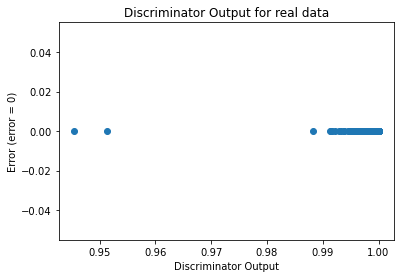

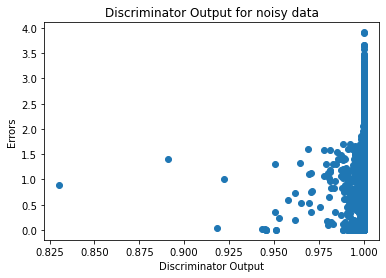

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)